<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/u

In [2]:
import nltk
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup as bs
import requests
import urllib.request

options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
from bs4 import BeautifulSoup as bs
import requests
import urllib.request

  
HEADERS = ({'User-Agent':
           'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36',
                           'Accept-Language': 'en-US, en;q=0.5'})

def getNames(soup):
  names = []
  names= soup.find_all('span',class_='a-profile-name')
  for i in range(2,len(names)): 
      names.append(names[i].get_text())
  return names

def getTitle(soup):
  titles = []
  title = soup.find_all('a',class_='review-title-content')
  for i in range(0,len(title)):
    titles.append(title[i].get_text())
  titles[:] = [titles.lstrip('\n') for titles in titles] 
  titles[:] = [titles.rstrip('\n') for titles in titles]
  return titles

def getRating(soup):
  ratings = []
  rating = soup.find_all('i',class_='review-rating') 
  for i in range(2,len(rating)):
    ratings.append(rating[i].get_text()) 
  return ratings

def getReview_text(soup):
  texts = []
  review_text= soup.find_all('span',class_='review-text-content') 
  for i in range(0,len(review_text)):
    texts.append(review_text[i].get_text()) 
    texts[:] = [reviews.lstrip('\n') for reviews in texts]  
    texts[:] = [reviews.rstrip('\n') for reviews in texts]
  return texts

def getReviewDate(soup):
  dates = []
  review_date = soup.find_all('span',class_='review-date')
  for i in range(2,len(review_date)):
    dates.append(review_date[i].get_text())
  return dates

def scrape():
  user_name=[]
  review_title=[]
  ratings=[]
  review_text=[]
  review_dates=[]
  for number in range(1,18):
    link= 'https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+ str(number) # By attaching the str(number) at the end the link generates dynamically
    print(link)
    webpage = requests.get(link, headers=HEADERS)
    soup = bs(webpage.content,'html.parser')

    nameList = getNames(soup)
    user_name.extend(nameList)

    titleList = getTitle(soup)
    review_title.extend(titleList)

    ratingsList = getRating(soup) 
    ratings.extend(ratingsList)

    reviewtextList = getReview_text(soup)
    review_text.extend(reviewtextList)

    datesList = getReviewDate(soup)
    review_dates.extend(datesList)
  
  print(len(user_name))
  print(len(review_title))
  print(len(ratings))
  print(len(review_text))
  print(len(review_dates))
  return (user_name, review_title, ratings, review_text, review_dates)



    

In [4]:
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import PorterStemmer
from textblob import Word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


def lowerCase(reviews_list):
  return reviews_list.apply(lambda x: " ".join(x.lower() for x in x.split()))


def removePunctuation(reviews_list):
  return reviews_list.str.replace('[^\w\s]','')


def removeSpecialCharcters(reviews_list):
  return reviews_list.apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


def removeStopWords(reviews_list):
  stop = stopwords.words('english')
  return reviews_list.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

def correctSpelling(reviews_list):
  return reviews_list.apply(lambda x: str(TextBlob(x).correct()))

def Tokenisation(reviews_list):
  return reviews_list.apply(lambda x: TextBlob(x).words)

def stemming(reviews_list):
  ps = PorterStemmer()
  return reviews_list.apply(lambda x: " ".join([ps.stem(word) for word in x]))

def lemmitization(reviews_list):
  return reviews_list.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
detailTuple = scrape()

https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Apple-iPhone-11-6

In [6]:
userNameList = detailTuple[0]
review_titleList = detailTuple[1]
ratings_list = detailTuple[2]
review_text_list = detailTuple[3]
review_dates_list = detailTuple[4]

In [7]:
import pandas as pd
df=pd.DataFrame()
df['User Name']=userNameList[0:len(review_titleList)]     # Appending the list to the df column
df['Review Title']=review_titleList
df['Review Text']=review_text_list
df['Star']=ratings_list
df['Review posted time']=review_dates_list
print(df.head(150))
df.to_csv("/content/sample_data/AmazonReviews.csv") 

           User Name                             Review Title  \
0           [brenda]                       Not FULLY Unlocked   
1        [Katherine]            NOT EXPECTED, GREAT PURCHASE!   
2        [Katherine]                   Phone was NOT unlocked   
3           [brenda]  Terribly Flawed. Don’t waste your time.   
4           [brenda]                     Basically brand new!   
..               ...                                      ...   
145  [Mary Robinson]                                   iPhone   
146             [Ty]                                Great Buy   
147             [Ty]                          Pretty Good Buy   
148            Sarah                              Do not buy!   
149            Joyce                           It’s alright .   

                                           Review Text                Star  \
0    Purchased this product advertised as fully unl...  1.0 out of 5 stars   
1    I was feeling a bit skeptical after I placed m...  4.0 out

In [8]:
review_df = df[['Review Title','Review Text']]

reviewtextList = df['Review Text']
reviewtextList = lowerCase(reviewtextList)
reviewtextList = removePunctuation(reviewtextList)
reviewtextList = removeSpecialCharcters(reviewtextList)
reviewtextList = removeStopWords(reviewtextList)
reviewtextList = correctSpelling(reviewtextList)
reviewtextList = Tokenisation(reviewtextList)
reviewtextList = stemming(reviewtextList)
reviewtextList = lemmitization(reviewtextList)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


In [9]:
review_df['Preprocessed_Review_Text'] = reviewtextList
review_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Review Title,Review Text,Preprocessed_Review_Text
0,Not FULLY Unlocked,Purchased this product advertised as fully unl...,purchas product advertis fulli unlock insert h...
1,"NOT EXPECTED, GREAT PURCHASE!",I was feeling a bit skeptical after I placed m...,feel bit skeptic place order prove wrong phone...
2,Phone was NOT unlocked,Phone was not unlocked could it use it,phone unlock could use
3,Terribly Flawed. Don’t waste your time.,The screen came cracked and popped out of the ...,screen came crack pop frame hope return proces...
4,Basically brand new!,This is the best experience I have ever had wi...,best experi ever buy renew phone phone came or...
...,...,...,...
155,Good,Good,good
156,Battery lasted only one month!,After a delay of two weeks of receiving the ph...,delay two week receiv phone get set horizon st...
157,DO NOT BUY THESE PHONES,"Seriously, pay a little more and buy new. The ...",serious pay littl buy new phone oper expect ph...
158,Overall very nice phone but isn’t really unloc...,The phone is very nice looking and it was so e...,phone nice look easi set phone took time set p...


In [10]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

In [11]:
wordTokenarray= []
for i in review_df['Preprocessed_Review_Text']:
  wordTokenarray.append(word_tokenize(i))

In [12]:
cleaned_data = [x for x in wordTokenarray if x != []]
repeat_list = list(itertools.chain.from_iterable(cleaned_data))

trigrams = nltk.trigrams(repeat_list)
FD = nltk.FreqDist(trigrams)
FD

FreqDist({('purchas', 'product', 'advertis'): 1,
          ('product', 'advertis', 'fulli'): 1,
          ('advertis', 'fulli', 'unlock'): 1,
          ('fulli', 'unlock', 'insert'): 1,
          ('unlock', 'insert', 'him'): 1,
          ('insert', 'him', 'card'): 2,
          ('him', 'card', 'work'): 2,
          ('card', 'work', 'contract'): 1,
          ('work', 'contract', 'servic'): 1,
          ('contract', 'servic', 'provid'): 1,
          ('servic', 'provid', 'check'): 1,
          ('provid', 'check', 'me'): 1,
          ('check', 'me', 'number'): 1,
          ('me', 'number', 'report'): 1,
          ('number', 'report', 'phone'): 1,
          ('report', 'phone', 'still'): 1,
          ('phone', 'still', 'lock'): 1,
          ('still', 'lock', 'origin'): 1,
          ('lock', 'origin', 'carrier'): 1,
          ('origin', 'carrier', 'phone'): 1,
          ('carrier', 'phone', 'came'): 1,
          ('phone', 'came', 'good'): 1,
          ('came', 'good', 'condit'): 1,
          (

In [13]:
from collections import Counter
bg = nltk.bigrams(repeat_list)
FD = nltk.FreqDist(bg)
bg_dict = dict(FD)
for i in bg_dict:
  print( str(i) + ':' + str(bg_dict[i] / repeat_list.count(i[0])))

Streaming output truncated to the last 5000 lines.
('return', 'dont'):0.020833333333333332
('dont', 'feel'):0.03125
('feel', 'scare'):0.08333333333333333
('scare', 'deal'):0.3333333333333333
('deal', 'tri'):0.07692307692307693
('tri', 'plea'):0.041666666666666664
('plea', 'got'):0.15384615384615385
('got', 'black'):0.030303030303030304
('black', '256gb'):0.2
('256gb', 'unlock'):1.0
('11', 'foi'):0.029411764705882353
('foi', '35'):0.5
('35', 'month'):0.5
('complet', 'dead'):0.13333333333333333
('dead', 'charg'):0.3333333333333333
('charg', 'took'):0.05454545454545454
('took', 'appl'):0.125
('appl', 'store'):0.0847457627118644
('store', 'told'):0.2222222222222222
('told', 'would'):0.25
('would', 'replac'):0.024390243902439025
('replac', 'with'):0.043478260869565216
('with', 'order'):0.25
('order', 'receiv'):0.05
('receiv', 'earli'):0.037037037037037035
('earli', 'octob'):0.125
('octob', '2020'):1.0
('2020', 'start'):1.0
('start', 'charg'):0.05555555555555555
('charg', 'issu'):0.018181818

In [15]:
complete_data = ''
j= []
count = 1
for i in review_df['Preprocessed_Review_Text']:
  complete_data = complete_data + i
  k = 'Review-' + str(i)
  j.append(k)
  count+= 1

In [16]:
from textblob import TextBlob
import nltk
nltk.download('brown')

np = []
fcy = []
for i in review_df['Preprocessed_Review_Text']:
  blob = TextBlob(i)
  for nouns in blob.noun_phrases:
    np.append(nouns)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [17]:
for w in np:
  npf = []
  for i in review_df['Preprocessed_Review_Text']:
    npf.append(i.count(w) / complete_data.count(w))
  fcy.append(np)
noun_phrases_Data = pd.DataFrame(fcy).T
noun_phrases_Data.columns = list(np)
noun_phrases_Data.j = j
noun_phrases_Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,purchas product advertis fulli unlock insert,card work contract servic provid check,number report phone,lock origin carrier phone,good condit couldn use servic provid,bit skeptic place order,wrong phone look brand,new besid minim,light scratch,imposs notic batteri life,...,work coma network happi,refurbish phone,fine profession pack includ item describ,batteri life,describ howev,phone wife discov screen replac unauthor screen prepar,big red balloon number,fine phone lock,full report system return seller day,refund properli
0,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,...,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert,purchas product advertis fulli unlock insert
1,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,...,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check,card work contract servic provid check
2,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,...,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone,number report phone
3,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,...,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone,lock origin carrier phone
4,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,...,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid,good condit couldn use servic provid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,phone w

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [18]:
reviewtextList = df['Review Text']
reviewtextList = lowerCase(reviewtextList)
reviewtextList = removePunctuation(reviewtextList)
reviewtextList = removeSpecialCharcters(reviewtextList)
reviewtextList = removeStopWords(reviewtextList)
reviewtextList = correctSpelling(reviewtextList)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


In [19]:
review_df['After Spelling Correction'] = reviewtextList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
review_df

,Review Title,Review Text,Preprocessed_Review_Text,After Spelling Correction
0,Not FULLY Unlocked,Purchased this product advertised as fully unl...,purchas product advertis fulli unlock insert h...,purchased product advertised fully unlocked in...
1,"NOT EXPECTED, GREAT PURCHASE!",I was feeling a bit skeptical after I placed m...,feel bit skeptic place order prove wrong phone...,feeling bit skeptically placed order prove wro...
2,Phone was NOT unlocked,Phone was not unlocked could it use it,phone unlock could use,phone unlocked could use
3,Terribly Flawed. Don’t waste your time.,The screen came cracked and popped out of the ...,screen came crack pop frame hope return proces...,screen came cracked popped frame hopefully ret...
4,Basically brand new!,This is the best experience I have ever had wi...,best experi ever buy renew phone phone came or...,best experience ever buying renewed phone phon...
...,...,...,...,...
155,Good,Good,good,good
156,Battery lasted only one month!,After a delay of two weeks of receiving the ph...,delay two week receiv phone get set horizon st...,delay two weeks receiving phone getting set ho...
157,DO NOT BUY THESE PHONES,"Seriously, pay a little more and buy new. The ...",serious pay littl buy new phone oper expect ph...,seriously pay little buy new phone operate exp...
158,Overall very nice phone but isn’t really unloc...,The phone is very nice looking and it was so e...,phone nice look easi set phone took time set p...,phone nice looking easy set phone took time se...


In [21]:
review_df.to_csv('/content/sample_data/AmazonReviews.csv')

In [22]:
import math
sentences = review_df["After Spelling Correction"].values.tolist()
words = set([j for i in sentences for j in i.split(" ")])
tf_idf_df = pd.DataFrame(words, columns=["words"])
count=1

In [23]:
def tf_idf(x,sentence):
  value = sentence.count(x)
  size = len(sentence.split(" "))
  if(value != 0):
    return (value/size)*(math.log(size/value, 10))
  else:
    return 0

In [24]:
for sentence in sentences:
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
  count=count+1
tf_idf_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review151,Review152,Review153,Review154,Review155,Review156,Review157,Review158,Review159,Review160
0,probably,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,purchasing,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,pm,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.027569,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,flicked,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,stopping,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,call,0.0,0.053013,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.036147,0.0,0.000000
1790,result,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.031218,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1791,let,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.081866,0.036147,...,0.027569,0.000000,0.0,0.0,0.048108,0.0,0.0,0.000000,0.0,0.033979
1792,span,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [25]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

search_sentence="An Outstanding movie with a haunting performance and best character development"
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english') 
X_set = {i for i in X_list if not i in stop_word}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list1 =[];list2 =[]
  for j in r_vector: 
      if j in X_set: list1.append(1)
      else: list1.append(0) 
      if j in Y_set: list2.append(1) 
      else: list2.append(0)
  return r_vector, list1, list2

In [26]:
def cc(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)): 
        count+= list1[i]*list2[i] 
  c = count / float((sum(list1)*sum(list2))**0.5) 
  return c

In [27]:
list3 = []
for l in review_df['After Spelling Correction']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(review_df['Review Text'],list3)), columns=['Review Text','cosine cimilarity'])
Data2

,Review Text,cosine cimilarity
0,Purchased this product advertised as fully unl...,0.000000
1,I was feeling a bit skeptical after I placed m...,0.000000
2,Phone was not unlocked could it use it,0.000000
3,The screen came cracked and popped out of the ...,0.000000
4,This is the best experience I have ever had wi...,0.072169
...,...,...
155,Good,0.000000
156,After a delay of two weeks of receiving the ph...,0.000000
157,"Seriously, pay a little more and buy new. The ...",0.000000
158,The phone is very nice looking and it was so e...,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [28]:
# Write your code here
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


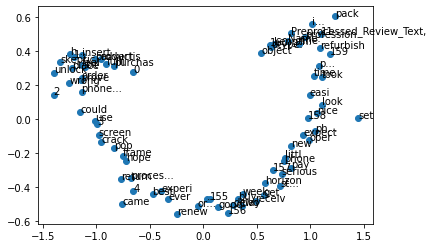

In [29]:
# define training data
# review_df['Preprocessed_Review_Text']
sentences = []
for i in df.index:
    tokens = str(review_df['Preprocessed_Review_Text']).split()
    sentences.append(tokens)
# train model
model = Word2Vec(sentences, size=300)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [30]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 6.5 MB 39.6 MB/s 
     |████████████████████████████████| 596 kB 52.9 MB/s 
     |████████████████████████████████| 127 kB 53.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.3 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.

In [31]:
from transformers import pipeline

In [ ]:
classifier = pipeline('sentiment-analysis')

In [ ]:
def converttovalues(sentilist):
  label = ''
  score = ''
  for sentidict in sentilist:
    label = sentidict['label']
    score = sentidict['score']
  return label, score

def splitText(combinedString):
  return ' '.join((combinedString.split())[:210])

def isFileExists(csvFile):
  return path.exists('/content/gdrive/MyDrive/SoftwareAdviceSentiment/'+csvFile)

def calucalteSentiscores(combinedStringList):
  sentiment_score = []
  sentiment_label = []
  for combinedString in combinedStringList:
    updatedString = splitText(combinedString)
    senti = classifier(updatedString)
    label,senti = converttovalues(senti)
    sentiment_score.append(senti)
    sentiment_label.append(label)
  return sentiment_score, sentiment_label

In [ ]:
prepreocessList = review_df['Preprocessed_Review_Text']
responseTuple = calucalteSentiscores(prepreocessList)

In [ ]:
len(prepreocessList)

170

In [ ]:
review_df['Sentiment_score'] = responseTuple[0]
review_df['Sentiment_'] = responseTuple[1]

In [ ]:
review_df

,Review Title,Review Text,Preprocessed_Review_Text,After Spelling Correction,Sentiment_score,Sentiment_
0,Not FULLY Unlocked,Purchased this product advertised as fully unl...,purchas product advertis fulli unlock insert h...,purchased product advertised fully unlocked in...,0.989639,NEGATIVE
1,"NOT EXPECTED, GREAT PURCHASE!",I was feeling a bit skeptical after I placed m...,feel bit skeptic place order prove wrong phone...,feeling bit skeptically placed order prove wro...,0.995181,NEGATIVE
2,Phone was NOT unlocked,Phone was not unlocked could it use it,phone unlock could use,phone unlocked could use,0.880247,NEGATIVE
3,Terribly Flawed. Don’t waste your time.,The screen came cracked and popped out of the ...,screen came crack pop frame hope return proces...,screen came cracked popped frame hopefully ret...,0.981320,POSITIVE
4,Basically brand new!,This is the best experience I have ever had wi...,best experi ever buy renew phone phone came or...,best experience ever buying renewed phone phon...,0.577204,NEGATIVE
...,...,...,...,...,...,...
165,Good,Good,good,good,0.999816,POSITIVE
166,Battery lasted only one month!,After a delay of two weeks of receiving the ph...,delay two week receiv phone get set horizon st...,delay two weeks receiving phone getting set ho...,0.998250,NEGATIVE
167,DO NOT BUY THESE PHONES,"Seriously, pay a little more and buy new. The ...",serious pay littl buy new phone oper expect ph...,seriously pay little buy new phone operate exp...,0.998417,NEGATIVE
168,Overall very nice phone but isn’t really unloc...,The phone is very nice looking and it was so e...,phone nice look easi set phone took time set p...,phone nice looking easy set phone took time se...,0.994472,NEGATIVE


In [ ]:
review_df.to_csv('/content/sample_data/Sentiment_reviews.csv')

In [ ]:
# The GitHub link of your final csv file

# Link: 

https://github.com/GollapudiBhanu/INFO5731/blob/main/Sentiment_reviews.csv



